## Implementation of the Kalman Filter in Python

https://arxiv.org/pdf/1204.0375

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
from scipy import signal 
import os
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
%matplotlib ipympl

In [3]:
def kf_predict(X, P, A, Q, B, U):
    X = np.dot(A, X) + np.dot(B, U)
    P = np.dot(A, np.dot(P, A.T)) + Q
    return(X,P)

In [4]:
def kf_update(X, P, Y, H, R):
    IM = np.dot(H, X)
    IS = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(P, np.dot(H.T, np.linalg.inv(IS)))
    X = X + np.dot(K, (Y-IM))
    P = P - np.dot(K, np.dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH)

In [19]:
def gauss_pdf(X, M, S):
    
    if np.shape(M)[1] == 1:
        DX = X - np.tile(M, np.shape(X)[1])
        E = 0.5 * np.sum(DX * (np.dot(np.linalg.inv(S), DX)), axis=0)
        E = E + 0.5 * np.shape(M)[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    elif np.shape(X)[1] == 1:
        DX = np.tile(X, np.shape(M)[1])- M
        E = 0.5 * np.sum(DX * (np.dot(np.linalg.inv(S), DX)), axis=0)
        E = E + 0.5 * np.shape(M)[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    else:
        DX = X-M
        E = 0.5 * np.dot(DX.T, np.dot(np.linalg.inv(S), DX))
        E = E + 0.5 * np.shape(M)[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    return (P[0],E[0])

In [33]:
#time step of mobile movement
dt = 0.1
# Initialization of state matrices
X = np.array([[0.0], [0.0], [0.1], [0.1]])
P = np.diag((0.01, 0.01, 0.01, 0.01))
A = np.array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,\
1]])
Q = np.eye(np.shape(X)[0])
B = np.eye(np.shape(X)[0])
U = np.zeros(np.shape(X)[0])
# Measurement matrices
Y = np.array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] +\
abs(np.random.randn(1)[0])]])
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = np.eye(np.shape(Y)[0])
# Number of iterations in Kalman Filter
N_iter = 50

In [40]:
# reale Trajektorie vorgeben
Y_real = np.ones((2, N_iter))

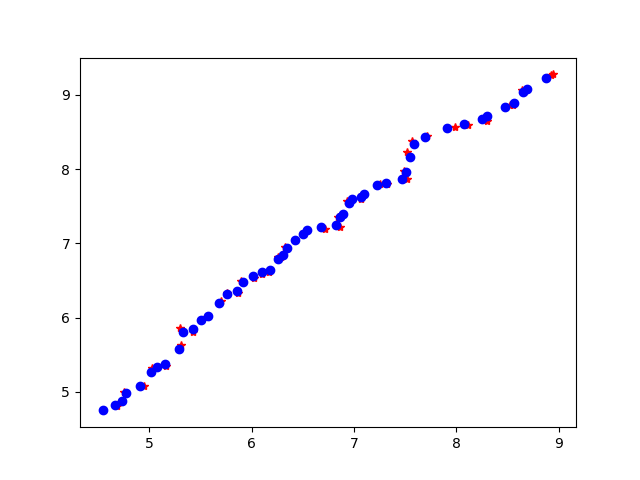

In [46]:
# Applying the Kalman Filter
plt.figure()
for i in np.arange(0, N_iter):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y = np.array([[X[0,0] + abs(0.1 * np.random.randn(1)[0])],[X[1, 0] + abs(0.1 * np.random.randn(1)[0])]])
    #Y = np.array([[Y_real[0, i] + abs(0.1 * np.random.randn(1)[0])], [Y_real[1, i] + abs(0.1 * np.random.randn(1)[0])]])
    plt.plot(Y[0],Y[1],'r*')
    plt.plot(X[0,0],X[1,0],'bo')
    #plt.plot(Y_real[0,i], Y_real[1,i], 'g+')